In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import umap.umap_ as umap

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
data, labels = mnist.data, mnist.target

c:\Users\Sanjana Rayarala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Standardize data
standardized_data = StandardScaler().fit_transform(data)

c:\Users\Sanjana Rayarala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Sanjana Rayarala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sanjana Rayarala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Sanjana Rayarala\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

c:\Users\Sanjana Rayarala\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


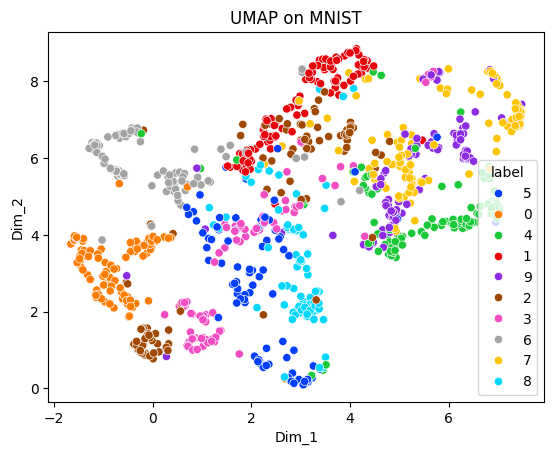

In [7]:
# Reduce to 2D using UMAP
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_data = umap_model.fit_transform(standardized_data[:1000, :])

# Convert to DataFrame
umap_df = pd.DataFrame(data=np.vstack((umap_data.T, labels[:1000])).T, columns=["Dim_1", "Dim_2", "label"])

# Plot
sns.scatterplot(data=umap_df, x="Dim_1", y="Dim_2", hue=umap_df["label"], palette="bright")
plt.title("UMAP on MNIST")
plt.show()
